## Full data

### variables/packages/data input

In [30]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

DATA_ENTRY = 9

In [31]:
lvl_actual_names = ['Scene0', 'Scene1', 'Scene2', 'Scene3 Enemy_y', 'Scene4 Enemy chasing', 
                    'Scene5 superpower', 'Scene6 TP', 'Scene7', 'Scene8']

In [71]:
level = ["Scene0","Scene1", "Scene2", "Scene3","Scene4","Scene5","Scene6","Scene7","Scene8"]

In [2]:
with open('qaqthebest.json') as f:    
    data = json.load(f)

In [15]:
df = pd.DataFrame(data['midtermFull'])
df = df.T

In [4]:
df.reset_index(drop=True, inplace=True)
df.head()

,collectBlue,collectRed,collectReducePackage,collectYellow,curDistance,numBounceEnemy,numHitEnemy,playTime,portalLockHit,resetTimes,sceneName
0,3,0,0,3,14.044996,0,0,2.546699,0,0,Scene0
1,1,0,0,3,38.318474,0,0,10.101494,0,1,Scene0
2,3,0,0,3,44.895409,0,0,15.769625,0,0,Scene1
3,2,0,1,2,49.618877,0,0,18.340008,0,0,Scene1
4,3,0,0,3,47.059929,0,0,10.240842,0,0,Scene0


### graph 1

In [5]:
df.groupby("sceneName")["playTime"].mean()

sceneName
Scene0                  10.736631
Scene1                  18.302352
Scene2                  23.300948
Scene3 Enemy_y           9.525599
Scene4 Enemy chasing     7.142124
Scene5 superpower       10.184067
Scene6 TP               12.789073
Scene7                  54.056558
Scene8                  48.632377
Name: playTime, dtype: float64

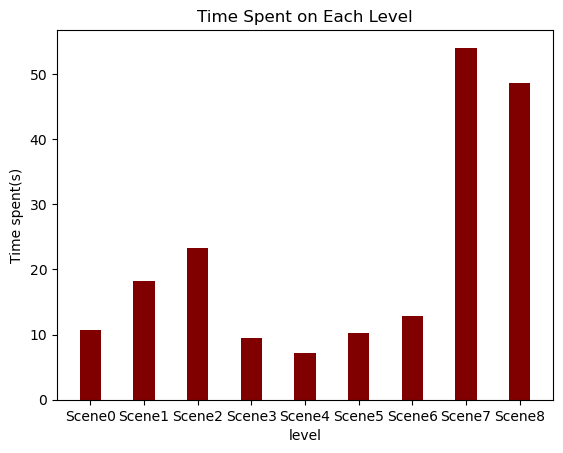

In [28]:
height = []
for i in range(DATA_ENTRY):
    height.append(df.groupby("sceneName")["playTime"].mean()[i])
plt.bar(level, height,  color ='maroon',
        width = 0.4)
 
plt.xlabel("level")
plt.ylabel("Time spent(s)")
plt.title("Time Spent on Each Level")
plt.show()

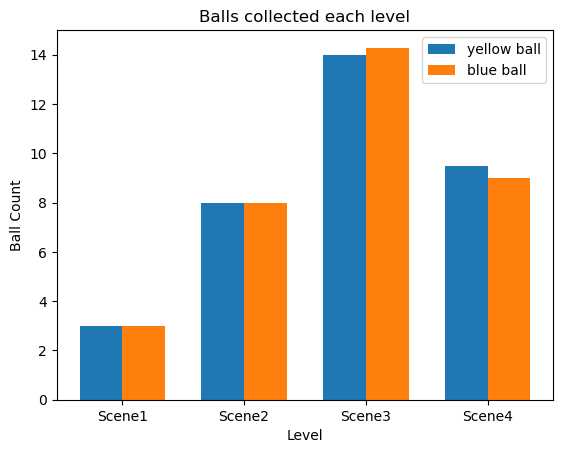

In [60]:
yellow_count = []
blue_count = []

for i in range(DATA_ENTRY):
    blue_count.append(df.groupby("sceneName")["collectBlue"].mean()[i])
    yellow_count.append(df.groupby("sceneName")["collectYellow"].mean()[i])

index = np.arange(4)
bar_width = 0.35

fig, ax = plt.subplots()
yellow = ax.bar(index, yellow_count, bar_width,
                label="yellow ball")

blue = ax.bar(index+bar_width, blue_count,
                 bar_width, label="blue ball")

ax.set_xlabel('Level')
ax.set_ylabel('Ball Count')
ax.set_title('Balls collected each level')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(level)
ax.legend()

plt.show()

In [61]:
df = pd.DataFrame(data['reset'])
df = df.T

In [62]:
df.reset_index(drop=True, inplace=True)
df.head()

,collectBlue,collectYellow,curDistance,playTime,sceneName
0,2,6,101.277962,131.159882,Scene3
1,8,8,56.804665,180.679382,Scene2
2,5,6,28.691246,18.331591,Scene2
3,18,12,301.319031,105.18512,Scene3
4,3,3,16.553102,4.1494,Scene1


In [63]:
df.groupby("sceneName")["playTime"].count()

sceneName
Scene1     7
Scene2     6
Scene3    12
Scene4     4
Name: playTime, dtype: int64

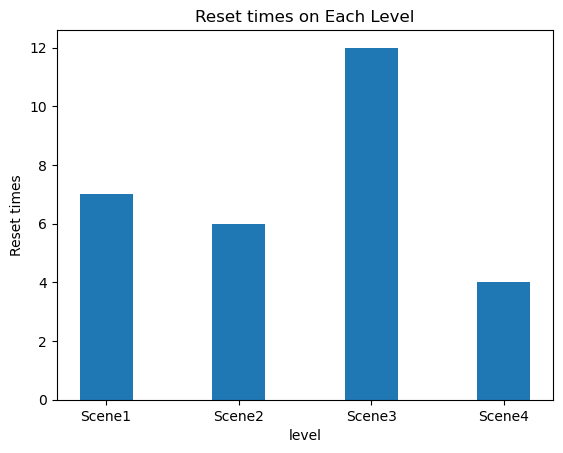

In [66]:
reset_times = []
for i in range(DATA_ENTRY):
    reset_times.append(df.groupby("sceneName")["playTime"].count()[i])
plt.bar(level, reset_times,
        width = 0.4)
 
plt.xlabel("level")
plt.ylabel("Reset times")
plt.title("Reset times on Each Level")
plt.show()

In [67]:
df.groupby("sceneName")["curDistance"].mean()

sceneName
Scene1     38.770086
Scene2     41.915103
Scene3    326.692815
Scene4    445.078655
Name: curDistance, dtype: float64

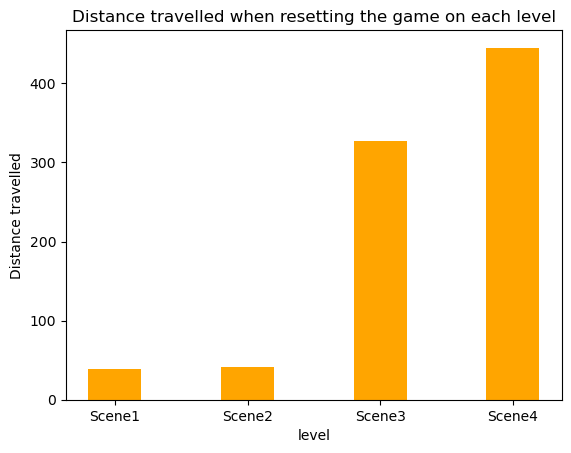

In [70]:
dist = []
for i in range(DATA_ENTRY):
    dist.append(df.groupby("sceneName")["curDistance"].mean()[i])
plt.bar(level, dist,color = 'orange',
        width = 0.4)
 
plt.xlabel("level")
plt.ylabel("Distance travelled")
plt.title("Distance travelled when resetting the game on each level")
plt.show()

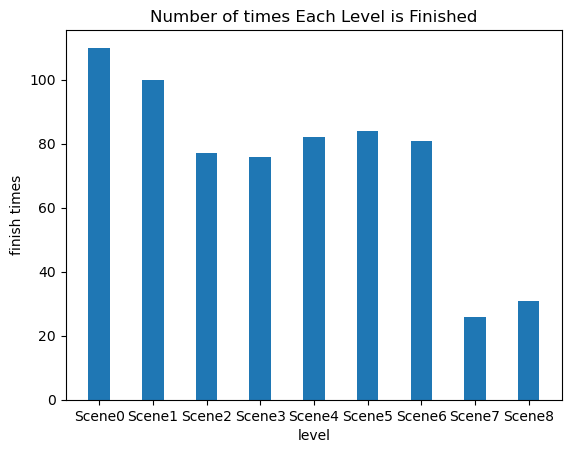

In [26]:
play_num = []
level_ordered = [0, 1, 5, 6, 3, 2, 4, 8, 7]
for i in level_ordered:
    play_num.append(df["sceneName"].value_counts()[i])
plt.bar(level, play_num,
        width = 0.4)
 
plt.xlabel("level")
plt.ylabel("finish times")
plt.title("Number of times Each Level is Finished")
plt.show()

In [9]:
df["sceneName"].value_counts()

Scene0                  110
Scene1                  100
Scene5 superpower        84
Scene4 Enemy chasing     82
Scene6 TP                81
Scene2                   77
Scene3 Enemy_y           76
Scene8                   31
Scene7                   26
Name: sceneName, dtype: int64

### heap map

In [23]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [77]:
time_range = ["<20s","20s~40s", "40s~1min", "1min~1.5min",">1.5min"]
bins = [0, 20, 40, 60, 90, 100000]

play_time = np.empty((0,5), int)

In [78]:
for i in range(DATA_ENTRY):
    scene_name = lvl_actual_names[i]
    row_added = np.array(df[df['sceneName']==scene_name]['playTime'].value_counts(bins=bins, sort=False).tolist())
    play_time = np.append(play_time, [row_added],axis=0) 

In [79]:
play_time

array([[96, 14,  0,  0,  0],
       [64, 34,  2,  0,  0],
       [44, 25,  4,  2,  2],
       [73,  3,  0,  0,  0],
       [82,  0,  0,  0,  0],
       [80,  4,  0,  0,  0],
       [75,  6,  0,  0,  0],
       [ 0,  2, 17,  6,  1],
       [ 2, 11,  8,  9,  1]])

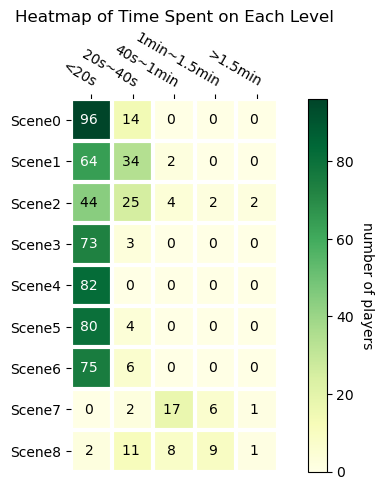

In [80]:
fig, ax = plt.subplots()

im, cbar = heatmap(play_time,level,time_range, ax=ax,
                   cmap="YlGn", cbarlabel="number of players")
texts = annotate_heatmap(im, valfmt="{x} ")

fig.tight_layout()
plt.title("Heatmap of Time Spent on Each Level")
plt.show()

## Reset data

In [21]:
df_reset = pd.DataFrame(data['resetMidterm'])
df_reset = df_reset.T

In [22]:
df_reset.reset_index(drop=True, inplace=True)
df_reset.head()

,collectBlue,collectRed,collectReducePackage,collectYellow,curDistance,numBounceEnemy,numHitEnemy,playTime,sceneName
0,3,0,0,3,85.072708,0,0,21.203413,Scene0
1,3,1,0,2,68.213913,0,0,30.787745,Scene2
2,2,1,0,3,75.178391,0,0,50.086254,Scene2
3,3,2,0,1,38.418503,0,0,9.339345,Scene2
4,3,1,0,2,34.109734,0,0,10.700724,Scene2
